<a href="https://colab.research.google.com/github/Thanchanokning/229351-STAT-LEARNING-FOR-DARA-1/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [111]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-06 16:13:17--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2cc8, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-06 16:13:17 (42.7 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [112]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [113]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'], #คอลั้มไหนเก็บวันที่
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


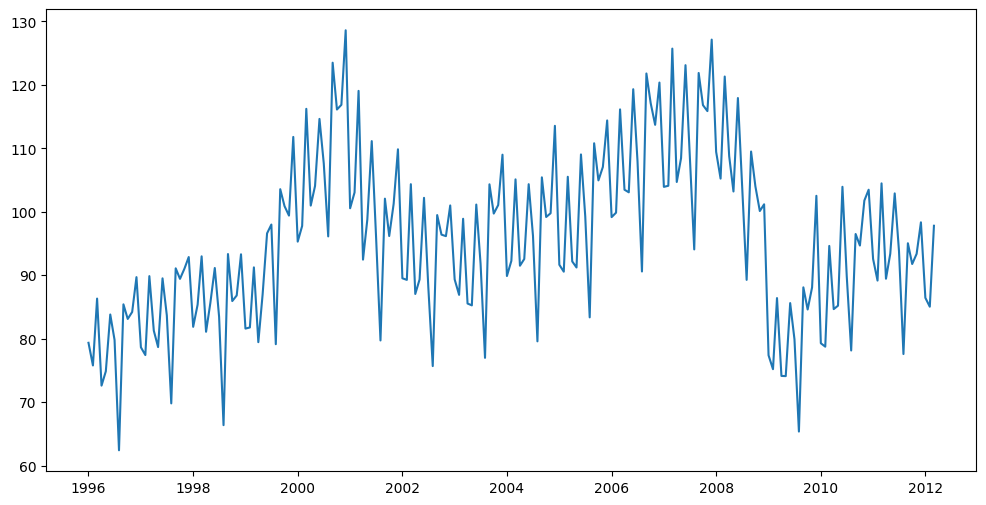

In [114]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [115]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [116]:
data.loc['1996-01-01'] #ดึงที่ต้องการ

,1996-01-01
Unnamed: 0,1.00
value,79.35


In [117]:
# Add or change values

data.loc['2012-01-01','value'] = 86
data.loc['2012-01-01','value'] = 86

data

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.00


# Moving average

In [118]:
data['MA'] = data['value'].rolling(window=5,center=True).mean() #เปลี่ยนฟังก์ชันได้เลย ถ้าจะหาอย่างอื่นตรงmean
data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,NaN
1996-04-01,4,72.60,NaN
1996-05-01,5,74.86,NaN
1996-06-01,6,83.81,NaN
1996-07-01,7,79.80,79.750417
1996-08-01,8,62.41,79.789167
1996-09-01,9,85.41,80.005000


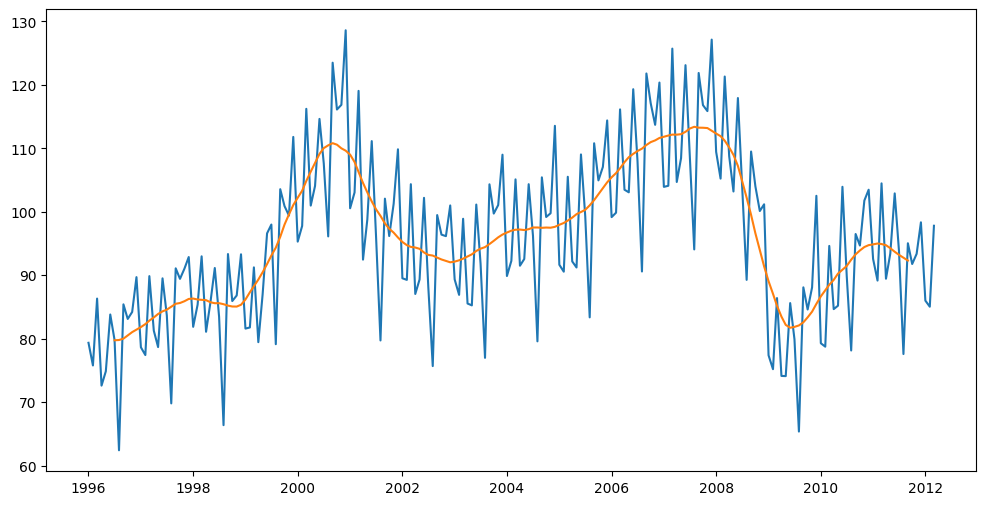

In [119]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

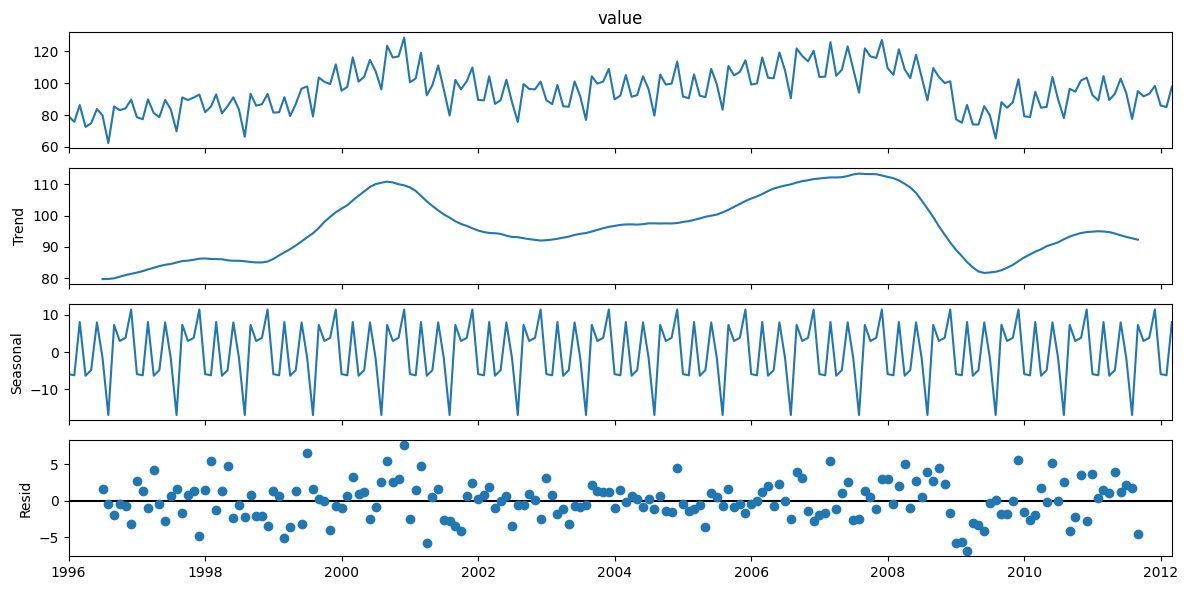

In [120]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive' ,
                            period =12)

result_add.plot();

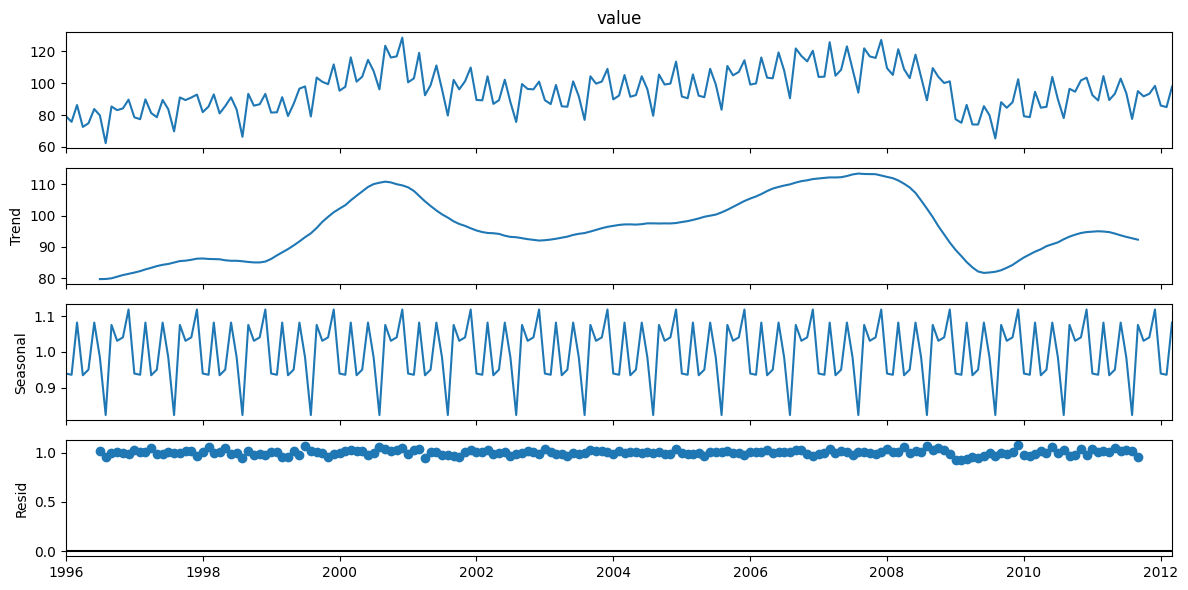

In [121]:
result_mul = seasonal_decompose(data['value'], model='multiplicative',period =12)

result_mul.plot();

### เรียกดูแต่ละส่วน

In [122]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: trend, Length: 195, dtype: float64
time
1996-01-01    -5.888140
1996-02-01    -6.199751
1996-03-01     8.082694
1996-04-01    -6.315445
1996-05-01    -4.818945
                ...    
2011-11-01     3.846888
2011-12-01    11.447027
2012-01-01    -5.888140
2012-02-01    -6.199751
2012-03-01     8.082694
Name: seasonal, Length: 195, dtype: float64
time
1996-01-01   NaN
1996-02-01   NaN
1996-03-01   NaN
1996-04-01   NaN
1996-05-01   NaN
              ..
2011-11-01   NaN
2011-12-01   NaN
2012-01-01   NaN
2012-02-01   NaN
2012-03-01   NaN
Name: resid, Length: 195, dtype: float64
time
1996-01-01    79.35
1996-02-01    75.78
1996-03-01    86.32
1996-04-01    72.60
1996-05-01    74.86
              ...  
2011-11-01    93.37
2011-12-01    98.34
2012-01-01    86.00
2012-02-01    85.04
2012-03-01    97

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [123]:

trainingset = data.loc['1996-01-01':'2009-12-01']
testset = data.loc['2010-01-01':'2012-03-01']
trainingset
testset

,Unnamed: 0,value,MA
time,,,
2010-01-01,169,79.28,86.665417
2010-02-01,170,78.74,87.613333
2010-03-01,171,94.62,88.496250
2010-04-01,172,84.66,89.266667
2010-05-01,173,85.20,90.256667
2010-06-01,174,103.94,90.866667
2010-07-01,175,89.87,91.460417
2010-08-01,176,78.14,92.448333
2010-09-01,177,96.50,93.293333


In [124]:

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(trainingset['value'], model='additive', period=12)
St = result.seasonal
Tt = result.trend
Rt = result.resid


In [125]:
St
Tt
Rt

,resid
time,
1996-01-01,NaN
1996-02-01,NaN
1996-03-01,NaN
1996-04-01,NaN
1996-05-01,NaN
...,...
2009-08-01,NaN
2009-09-01,NaN
2009-10-01,NaN


In [126]:
That = result.trend.dropna().iloc[-1]
Shat = result.seasonal.dropna().iloc[:12]
Shat = list(Shat)
Rhat = result.resid.dropna().iloc[-1]
print (That)
print (Shat)
print (Rhat)


81.725
[-5.98585737179487, -5.957940705128207, 8.183245192307693, -6.462427884615383, -5.041177884615387, 7.5529887820512815, -1.6409535256410257, -17.138902243589744, 8.178886217948719, 3.378341346153848, 3.6443349358974384, 11.28946314102564]
-3.6679887820512764


In [132]:
testsetnew = Shat+Rhat+That
testsetnew

array([72.07115385, 72.09907051, 86.24025641, 71.59458333, 73.01583333,
       85.61      , 76.41605769, 60.91810897, 86.23589744, 81.43535256,
       81.70134615, 89.34647436])

In [149]:
Shat_extended = Shat * (len(testset) // 12) + Shat[:len(testset) % 12]
testsetneww = pd.Series([That + Rhat + s for s in Shat_extended], index=testset.index)
testsetneww


,0
time,
2010-01-01,72.071154
2010-02-01,72.099071
2010-03-01,86.240256
2010-04-01,71.594583
2010-05-01,73.015833
2010-06-01,85.610000
2010-07-01,76.416058
2010-08-01,60.918109
2010-09-01,86.235897


In [183]:
testset[['value', 'forecast']]

,value,forecast
time,,
2010-01-01,79.28,72.071154
2010-02-01,78.74,72.099071
2010-03-01,94.62,86.240256
2010-04-01,84.66,71.594583
2010-05-01,85.20,73.015833
2010-06-01,103.94,85.610000
2010-07-01,89.87,76.416058
2010-08-01,78.14,60.918109
2010-09-01,96.50,86.235897


In [184]:
y_true = testset['value']
y_pred = testset['forecast']

In [185]:
import numpy as np
def rmse(y_true,y_pred):

  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
   return np.sqrt(np.mean(np.square(y_true-y_pred)))
print(rmse(y_true, y_pred))

14.573954571713132


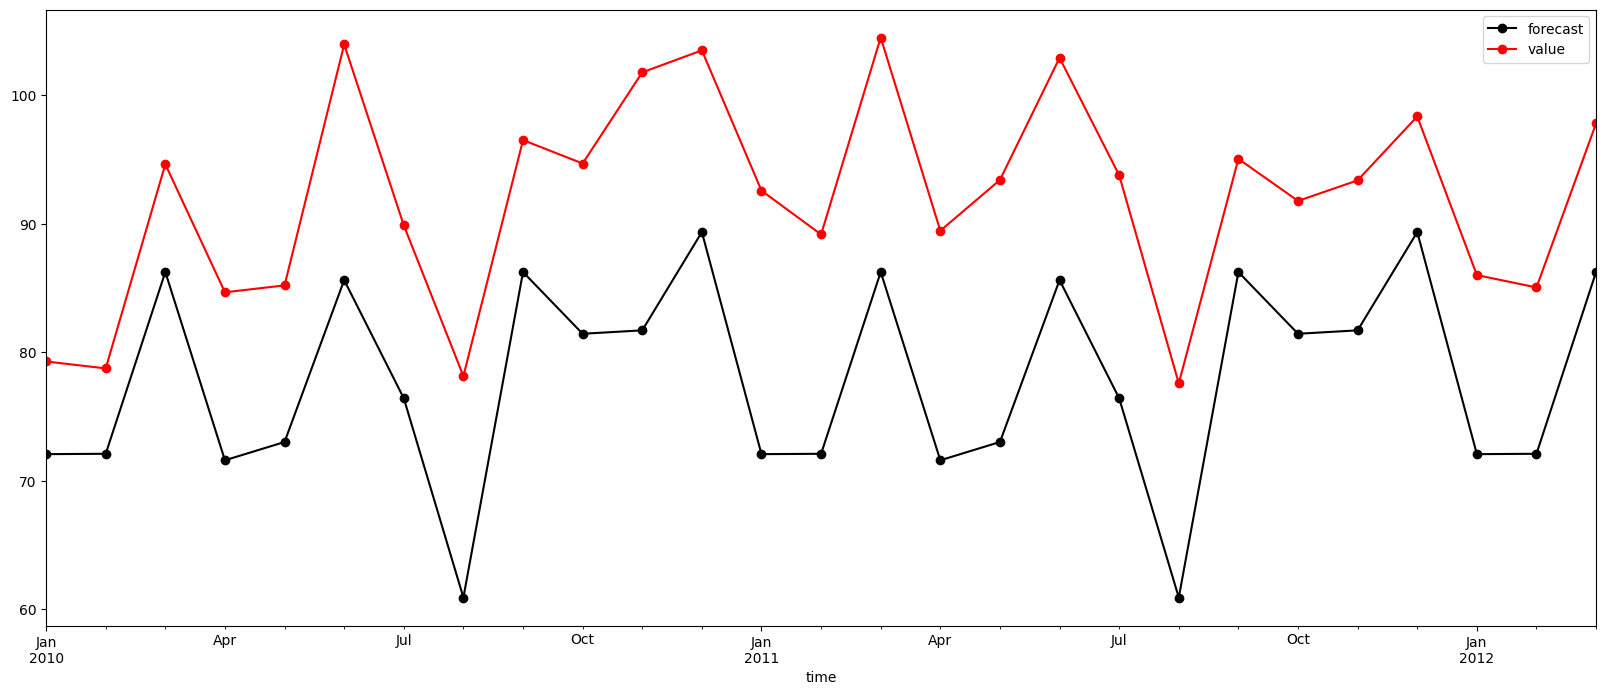

In [191]:
ax = testset['forecast'].plot(marker='o', color='Black', figsize=(20,8))
ax = testset['value'].plot(marker='o', color='Red', figsize=(20,8))
ax.legend(['forecast','value'])